### Question 1:
Maze solver.

This is the maze we want to solve:


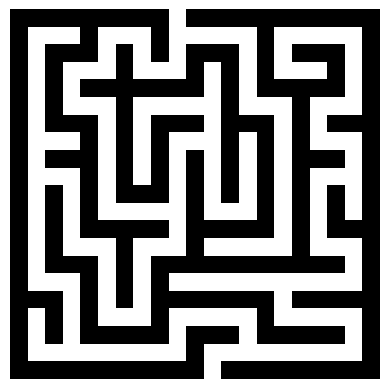

In [95]:
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as mp
import random

# Open the maze image and assign the width and height
maze = Image.open('maze-2.png').convert('L')
w, h = maze.size

# Ensure all black pixels are 0 and all white pixels are 1
binary = maze.point(lambda p: p > 128 and 1)

# Resize to ensure each cell takes up a single element in the array
compact_maze = binary.resize((w // 10, h // 10), Image.NEAREST)
w, h = compact_maze.size

# Convert to Numpy array
maze = np.array(compact_maze)
visited = np.zeros((21,21))
print("This is the maze we want to solve:")
mp.imshow(maze, cmap='gray')
mp.axis('off')
mp.show()

#### Backtracking Method

In [96]:
direction = "DLRU"
y = [1, 0, 0, -1]
x = [0, -1, 1, 0]

def Clear(maze, row, col, size):
    return 0 <= row < size and 0 <= col < size and maze[row][col] == 1

def Backtrack(maze, row, col, size, ans, path, visited):
    if row == size-1 and maze[row][col] == 1:
        ans.append(", ".join(path))
        return
    
    maze[row][col] = 0
    visited[row][col] = 2
    for i in range(4):
        next_row = row + y[i]
        next_col = col + x[i]
        if Clear(maze, next_row, next_col, size):
            path += direction[i]
            Backtrack(maze, next_row, next_col, size, ans, path, visited)
            path = path[:-1]

    maze[row][col] = 1  

In [100]:
maze = np.array(compact_maze)
size = len(maze)
result = []
path = []
run = 0
success = 0
while run < 10000:
    Backtrack(maze, 0, 9, size, result, path, visited)
    if result:
        success = success + 1
        result = []
        path = []
    run = run + 1

print(f"The success rate is {success / run}")




The success rate is 1.0


#### Las Vegas Method

In [118]:
def LasVegas(maze, row, col, size, ans, path, visited):
    steps = 0
    success = False
    while success == False or steps <= 400:
        i = random.randrange(0, 4)
        next_row = row + y[i]
        next_col = col + x[i]
        if Clear(maze, next_row, next_col, size):
            visited[next_row][next_col] = 2
            path.append(direction[i])
            row = next_row
            col = next_col
         
        if row == size - 1 and maze[row][col] == 1:
            ans.append(", ".join(path))
            success = True
        steps = steps + 1
    return None

In [101]:
maze = np.array(compact_maze)
size = len(maze)
result = []
path = []
run = 0
success = 0
while run < 10000:
    LasVegas(maze, 0, 9, size, result, path, visited)
    if result:
        success = success + 1
        result = []
        path = []
    run = run + 1

print(f"The success rate is {success / run}")

The success rate is 1.0


#### Driver Code

The path to get to the exit is:['D, D, U, D, U, U, D, D, D, U, D, U, U, R, L, D, D, L, R, U, U, R, R, R, R, D, D, U, U, D, U, D, D, U, U, L, L, L, R, L, L, R, R, L, L, D, U, D, U, R, R, R, L, L, R, L, L, D, D, U, U, D, D, U, U, R, R, R, L, L, R, R, R, L, L, R, R, L, L, R, R, L, L, L, L, U, D, R, R, R, L, R, R, L, L, L, R, R, R, D, D, D, U, D, D, U, D, U, D, R, L, U, D, U, D, R, L, R, R, D, U, D, U, L, R, L, L, R, R, L, L, R, R, L, L, R, L, R, R, L, L, R, R, L, R, L, R, L, R, D, U, L, L, R, L, U, D, R, L, R, L, R, L, U, U, U, U, L, R, D, D, U, U, L, R, L, L, R, R, L, R, L, R, L, L, R, L, R, R, L, L, L, R, L, L, R, R, R, L, L, L, U, D, R, L, D, D, L, R, L, R, L, L, R, R, U, U, R, L, R, R, R, R, L, L, L, R, L, L, U, D, D, U, D, D, L, R, L, R, L, L, U, U, L, L, D, U, D, U, D, U, R, R, D, U, D, U, D, U, L, L, D, U, R, L, R, R, D, U, D, U, L, L, R, R, L, R, L, L, D, U, D, U, D, D, L, L, D, D, U, D, R, L, R, L, U, U, R, R, U, U, D, D, U, D, U, D, U, D, U, D, L, R, L, R, U, D, U, U, R, L, R, L

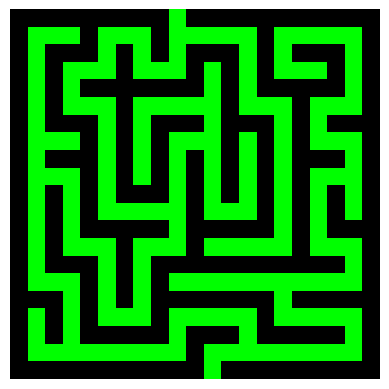

In [130]:
# Setup conditions for the maze solver functions
maze = np.array(compact_maze)
size = len(maze)
result = []
path = []

# Algorithm to select maze solver method via user input
method = input("Would you like to solve the maze using a backtracking or a Las Vegas method? ") 
check = False
while check == False:
    if method == "Backtracking":
        Backtrack(maze, 0, 9, size, result, path, visited)
        check = True
    elif method == "Las Vegas":
        LasVegas(maze, 0, 9, size, result, path, visited)
        check = True
    # Avoiding invalid input
    else:
        method=input("Sorry I didn't recognise that, please enter either Backtracking or Las Vegas: ")

# Mark any unvisited cells in the visited array
for i in range(size):
    for j in range(size):
        if maze[i][j] == 1:
            if visited[i][j] != 2:
                visited[i][j] = 1

print("The path to get to the exit is:" + str(result))
print("")

# Assign colours to specific values
# Black for walls, white for unvisited cells, green for visited cells
colours = {0: np.array([0, 0, 0]), 1: np.array([255, 255, 255]), 2: np.array([0, 255, 0])} 

# Use a 3D array to assign color   
visited_coloured = np.ndarray(shape = (visited.shape[0], visited.shape[1], 3), dtype = int)
for i in range(0, visited.shape[0]):
    for j in range(0, visited.shape[1]):
        visited_coloured[i][j] = colours[visited[i][j]]

print("The visited squares while searching for the correct path are shown in green: ")
mp.imshow(visited_coloured)
mp.axis("off")
mp.show()


### Question 2:
Minimum Spanning Tree from a weighted connected graph.

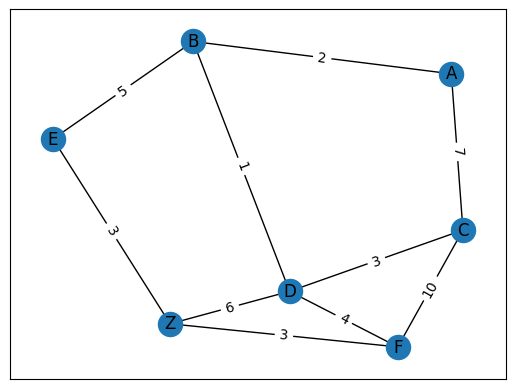

In [ ]:
import matplotlib.pyplot as mp
import networkx as nx
import pandas as pd

# Construct the graph
G = nx.Graph()
nodes = ["A", "B", "C", "D", "E", "F","Z"]
G.add_nodes_from(nodes)
G.add_edge("A", "B", weight = 2)
G.add_edge("A", "C", weight = 7)
G.add_edge("B", "D", weight = 1)
G.add_edge("B", "E", weight = 5)
G.add_edge("C", "D", weight = 3)
G.add_edge("C", "F", weight = 10)
G.add_edge("D", "F", weight = 4)
G.add_edge("D", "Z", weight = 6)
G.add_edge("E", "Z", weight = 3)
G.add_edge("F", "Z", weight = 3)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, style = "solid")
nx.draw_networkx_labels(G, pos)
weight = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, weight)
mp.show()

In [88]:
# Convert to a Pandas DataFrame
adj_matrix = nx.to_pandas_adjacency(G)

# Convert to a NumPy array for easy iteration
adj_matrix = np.array(adj_matrix).astype(int)
print(adj_matrix)


[[ 0  2  7  0  0  0  0]
 [ 2  0  0  1  5  0  0]
 [ 7  0  0  3  0 10  0]
 [ 0  1  3  0  0  4  6]
 [ 0  5  0  0  0  0  3]
 [ 0  0 10  4  0  0  3]
 [ 0  0  0  6  3  3  0]]


#### MST using Prims Algorithm

In [89]:
# Assign a matrix to store the MST edges.
mst_matrix = np.zeros([7,7]).astype(int)
prim = len(adj_matrix)

# Erase the first column of edges
for row in range(prim):
    for col in range(1):
        adj_matrix[row][col]=0

# Iterate over the nodes, adding the lowest weighted edge each time starting from node A
for stage in range(prim):
    lowest_edge = 0
    row_track = 0
    col_track = 0
    for row in range(stage + 1):
        for col in range(prim):
            if adj_matrix[row][col] != 0:   
                if lowest_edge == 0 or adj_matrix[row][col] < lowest_edge:
                    lowest_edge = adj_matrix[row][col]
                    row_track = row
                    col_track = col               
    mst_matrix[row_track][col_track] = adj_matrix[row_track][col_track]                
    for row in range(prim):
        for col in range(col_track, col_track + 1):
            adj_matrix[row][col] = 0

print(mst_matrix)

[[0 2 0 0 0 0 0]
 [0 0 0 1 5 0 0]
 [0 0 0 0 0 0 0]
 [0 0 3 0 0 4 0]
 [0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


In [ ]:
# Convert back to a Pandas DataFrame
mst_labelled = pd.DataFrame(mst_matrix, index = ["A", "B", "C", "D", "E", "F", "Z"], columns = ["A", "B", "C", "D", "E", "F", "Z"])
print(mst_labelled)


   A  B  C  D  E  F  Z
A  0  2  0  0  0  0  0
B  0  0  0  1  5  0  0
C  0  0  0  0  0  0  0
D  0  0  3  0  0  4  0
E  0  0  0  0  0  0  3
F  0  0  0  0  0  0  0
Z  0  0  0  0  0  0  0


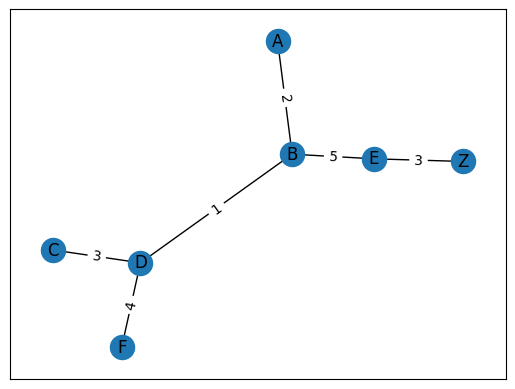

The total weight of the MST is: 18


In [ ]:
#Gather data from the DataFrame
mst = nx.from_pandas_adjacency(mst_labelled)

# Construct the tree with weighted labels
pos = nx.spring_layout(mst)
nx.draw_networkx_nodes(mst, pos)
nx.draw_networkx_edges(mst, pos, style = "solid")
nx.draw_networkx_labels(mst, pos)
weight = nx.get_edge_attributes(mst, "weight")
nx.draw_networkx_edge_labels(mst, pos, weight)
mp.show()

# Sum the wieghts
count = len(mst_matrix)
mst_total_weight = 0
for row in range(count):
    for col in range(count):
        mst_total_weight = mst_total_weight + mst_matrix[row][col]

print(f"The total weight of the MST is: {mst_total_weight}")


### Question 3:
<p>The Quick Sort algorithm is a particularly fast sorting method, with no additional storage needed than the list of values to be sorted (Hoare, 1961). The example below utilises the Hoare Partition Scheme (Hoare, 1961). With the addition of the pivot being fixed as the midpoint of the values with the first and last index in each partition, using floor division.</p>
<p>The Partition function has one index at either side of the list, incrementing into the list until both are equal to the index of the pivot point; the values less than the pivot are to the left of the pivot; and the values greater than the pivot are to the right of the pivot. The QuickSort function calls the partition function on the entire list, then on each half recursively until the entire list is sorted.</p>

#### Pseudocode


    Partition(list, low, high)
        pivot := middle element of list
        low_index := low - 1
        high_index := high + 1

        Loop forever
            increment low_index by 1
            while list[low_index] < pivot
                increment low_index by 1
            decrement high_index by 1
            while list[high_index] > pivot
                decrement high_index by 1
            if low_index >= high_index
                return high_index
            else
                swap list[low_index] and list[high_index] 

    QuickSort(list, low, high)
        if low < high
            pivot_index := Partition(list, low, high)
            QuickSort(list, low, pivot_index) //partition and sort the elements left of the pivot
            QuickSort(list, pivot_index + 1, high) //partition and sort the elements right of the pivot

#### Algorithm

In [ ]:
def Partition(list, low, high):
    pivot = list[(low + high) // 2] # Midpoint of the current partition
    low_index = low - 1 
    high_index = high + 1

    while True:
        low_index = low_index + 1
        # Increment first index
        while list[low_index] < pivot: # Reverse the sign to change the sort order
            low_index = low_index + 1
        high_index = high_index - 1
        # Decrement second index
        while list[high_index] > pivot: # Reverse the sign to change the sort order
            high_index = high_index - 1
        # Check if the values have been partitioned with respect to the pivot
        if low_index >= high_index:
            return high_index
        # Swap the values to the correct partitions
        list[low_index], list[high_index] = list[high_index], list[low_index]

def QuickSort(list, low, high):
    if low < high:
        # Partition the values with respect to the pivot
        pivot_index = Partition(list, low, high)
        # Sort the lower values partition
        QuickSort(list, low, pivot_index)
        # Sort the higher values partition
        QuickSort(list, pivot_index + 1, high)

# Example driver code using a list of integers to be sorted in ascending order
integers = [9, 1, 8, 7, 4, 3, 6, 2]
QuickSort(integers, 0, len(integers) - 1)
print(integers)

# Example driver code using a list of cities to be sorted alphabetically
cities = ["London", "Paris", "Rome", "Canberra", "Brussels"]
QuickSort(cities, 0, len(cities) - 1)
print(cities)

[1, 2, 3, 4, 6, 7, 8, 9]
['Brussels', 'Canberra', 'London', 'Paris', 'Rome']


### Question 4:
The algorithm below first formats a string into all lowercase letters to allow comparison of all characters. If the string is only a signle character then it is by definition a palindrome, so no processing is required. If the string is longer, the function is recursively called to compare the outermost characters, progressing towards the centre character(s). If all characters can be successfully confirmed as matching then the function will return true, otherwise it will return false.

In [324]:
def isPalindrome(palindrome):
    #standardise the case to ensure all characters can be compared
    palindrome=palindrome.lower() 
    #identify a string of only one character or if the recursive algorithm has successfully reached the centre of the string
    if len(palindrome)<2: 
        return True
    if palindrome[0]==palindrome[len(palindrome)-1]:
        return isPalindrome(palindrome[1:len(palindrome)-1])
    #not a palindrome
    else:
        return False

An example of calling the function with a non-palindrome:

In [325]:
a="Horticulture"
if isPalindrome(a):
    print("The word is a palindrome.")
else:
    print("The word is not a palindrome.")

The word is not a palindrome.


With a palindrome:

In [326]:
b="Detartrated"
if isPalindrome(b):
    print("The word is a palindrome.")
else:
    print("The word is not a palindrome.")

The word is a palindrome.


With a user-inputted string, the input used was "Rotator":

In [328]:
c=input("Enter a word to check if it is a palindrome.")
if isPalindrome(c):
    print("The word is a palindrome.")
else:
    print("The word is not a palindrome.")

The word is not a palindrome.
